<a href="https://colab.research.google.com/github/abhiramramesh422-code/IMDB-Movie-Review-Dataset/blob/main/imdb_sentiment_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())
print(df['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [3]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [4]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nModel: {model_name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return {"Model": model_name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}


Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.90      0.90     10000



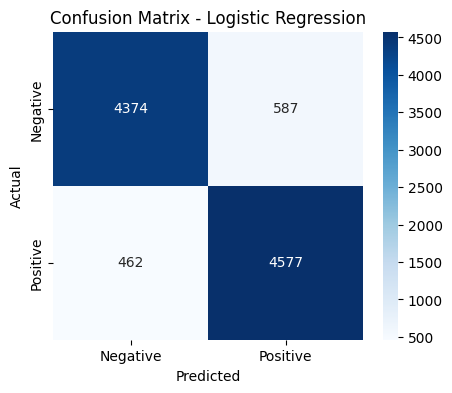


Model: Linear SVM
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



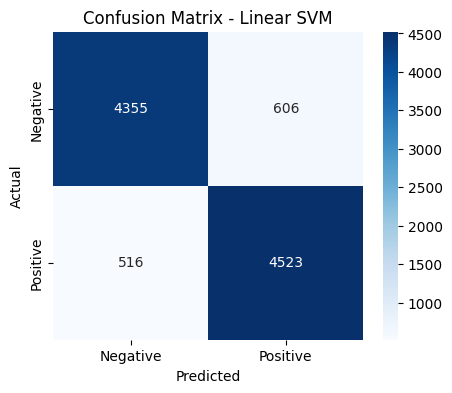


Model: Naive Bayes
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



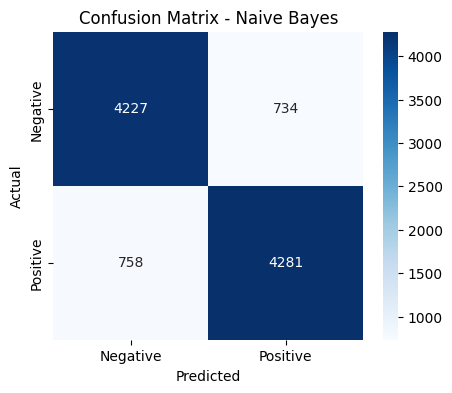


Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      4961
           1       0.86      0.82      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



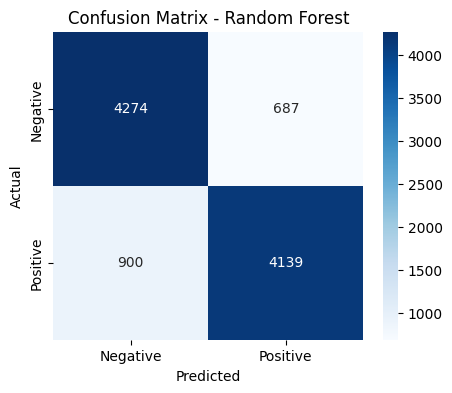

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.8951,0.886328,0.908315,0.897187
1,Linear SVM,0.8878,0.881848,0.897599,0.889654
2,Naive Bayes,0.8508,0.853639,0.849573,0.851601
3,Random Forest,0.8413,0.857646,0.821393,0.839128


In [5]:
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)
svm = LinearSVC()
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

results = []
results.append(evaluate_model(log_reg, X_train_tfidf, y_train, X_test_tfidf, y_test, "Logistic Regression"))
results.append(evaluate_model(svm, X_train_tfidf, y_train, X_test_tfidf, y_test, "Linear SVM"))
results.append(evaluate_model(nb, X_train_tfidf, y_train, X_test_tfidf, y_test, "Naive Bayes"))
results.append(evaluate_model(rf, X_train_tfidf, y_train, X_test_tfidf, y_test, "Random Forest"))

results_df = pd.DataFrame(results)
results_df

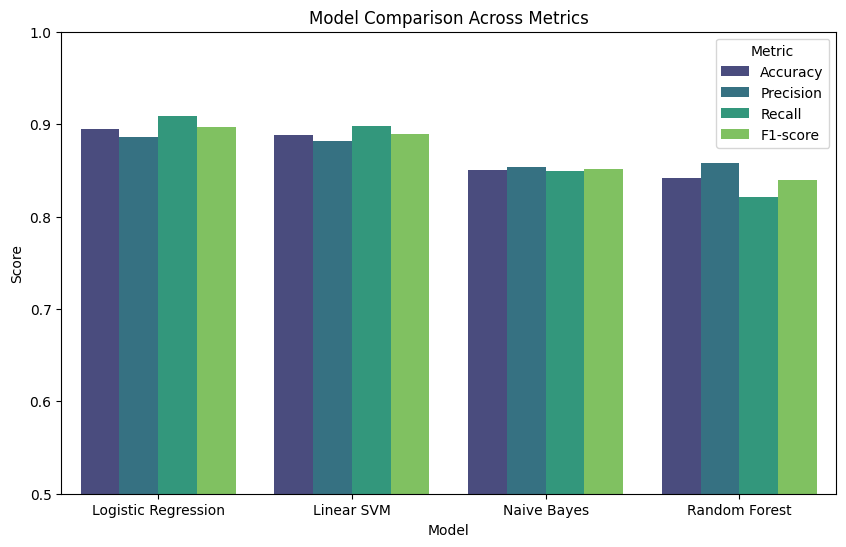

In [7]:
metrics = ['Accuracy','Precision','Recall','F1-score']

plt.figure(figsize=(10,6))
results_melted = results_df.melt(id_vars="Model", value_vars=metrics, var_name="Metric", value_name="Score")

sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="viridis")

plt.ylim(0.5, 1.0)
plt.title("Model Comparison Across Metrics")
plt.legend(title="Metric")
plt.show()
